# Introduction

In [1]:
# use this format: <body><p> write your writeup here. </p></body>
# make sure you use markdown, not code.
# provided by spotify

# Importing Libraries

<body>
    <p>We used Python 3 in Jupyter notebook. From the notebook, libraries such as numpy, pandas, and matplotlib were imported.</p>
</body>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

<body><p>some more things about importing lib</p></body>

# Collecting Data

<body>
    <p/> In order to use the dataset, We first need to download the .csv file of our data. You can find and download the .zip folder of the dataset for our tutorial <a src = https://www.kaggle.com/vicsuperman/prediction-of-music-genre/version/1>here</a>. Download and unzip the .csv file from zip folder, put it in your working folder.
</body>

In [3]:
data_path  = "music_genre.csv"
data_df = pd.read_csv(data_path)

<body>
    <p>Here, we defined the .csv file, the dataset we want to read in as "data_path".</p>
    <p>Then the .csv file was read in using pandas' read_csv() function. </p>
</body>

# Tidying Data

In [4]:
# remove certain columns that are not neccessary for our tutorial 
data_df = data_df.drop(["instance_id", "obtained_date"],axis=1)
data_df = data_df.dropna()

# remove rows with a duration length equal to -1.0
data_df = data_df[data_df.duration_ms != -1.0]
data_df = data_df.reset_index(drop=True)
data_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
1,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45056,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
45057,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
45058,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
45059,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


<body>
    <p> Before we process any further with our dataset, we have to make sure the data is tidy and good to use. Let's look over the data and see if any column is unnecessary for our analysis in the future. </p>
    <p /> 
    <p> As we see, the pandas DataFrame gives us indexing, therefore it is not necessary to have the column "instance_id". Also, since we will not work with the column "obtained_date", we can also remove that column. The two columns have been dropped using pandas.drop() function as shown in the code above.</p>
    <p /> Next, let's make check if our data points have any meaningless values.
    <p>From the "duration_ms" column, there were several data points logged as -1.0ms, meaning the song's duration was -1ms. However, that does not make sense. In order to deal with rows with -1.0ms of song duration, we only included rows with the song duration is not -1.0ms using a generic python code above, which compares and includes rows with value of the column "duration_ms" is not equal to -1.0.
    </p>
</body>

# Exploratory Data Analysis

<body>
    <p />The main column that we will be looking at and analyzing is the popularity score/index. This data is provided by Spotify, and the popularity score is rated on a scale of 0 to 100. There are numerous different factors that are taken into account to calculate the popularity score for a particular track, but it is mainly determined by total streaming numbers, save rate, skip rate, and share rate.
    <p />Another column that we will be focusing on is the "valence" score/index. Valence is a numerical data point ranging from 0.0 to 1.0, describing the overall tone of the track. If the valence score is high, meaning closer to 1, then it means that the track will be positive, cheerful, happy, or euphoric. Whereas if the valence score is low, meaning closer to 0, then it means that the track will be more negative, sad, angry, or depressing.
</body>

## Counting Tracks per Genre

<body>
    <p /> Write something like "We want to check if the data we are using is fair or not... etc." idk. some intro to this analysis
</body>

Anime          4527
Electronic     4517
Blues          4517
Hip-Hop        4510
Alternative    4509
Country        4508
Jazz           4503
Rock           4493
Classical      4489
Rap            4488
Name: music_genre, dtype: int64


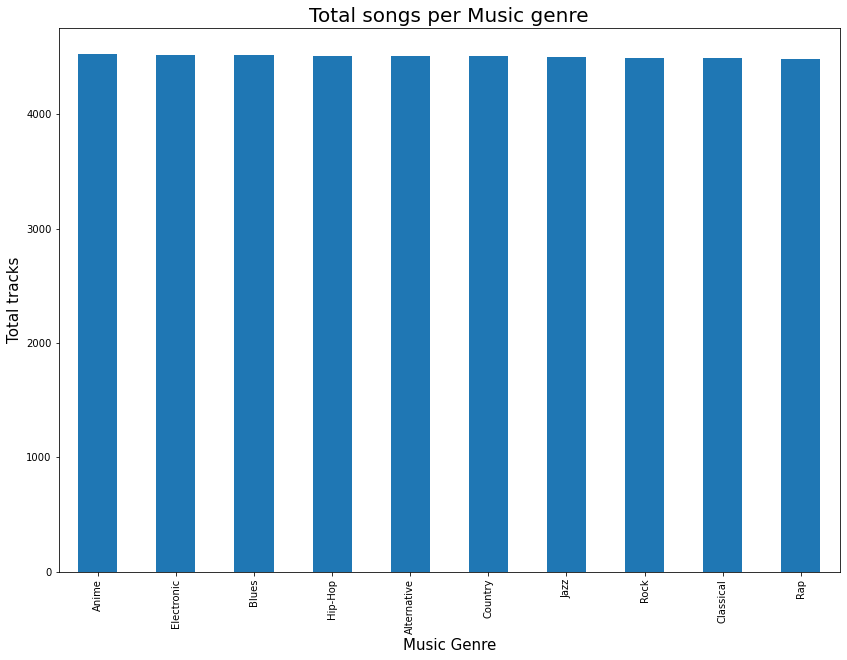

In [5]:
plt.figure(figsize = (14,10))
data_df["music_genre"].value_counts().plot.bar()
        
plt.title("Total songs per Music genre", fontsize = 20)
plt.xlabel("Music Genre", fontsize = 15)
plt.ylabel("Total tracks", fontsize = 15)

print(data_df["music_genre"].value_counts())

<body><p>This plot and data shows that there the total number of tracks for each music genre is very similar to each other with the highest total track for one genre being 4527 for Anime and the lowest total track for one genre being 4488 for Rap. Which is a difference of only 39. This indicates that in the future when we are analyzing data that observes the genre of the track we know that the total number of tracks for one genre will not affect the analysis or cause any biases. </p></body>

## Genre vs. Popularity

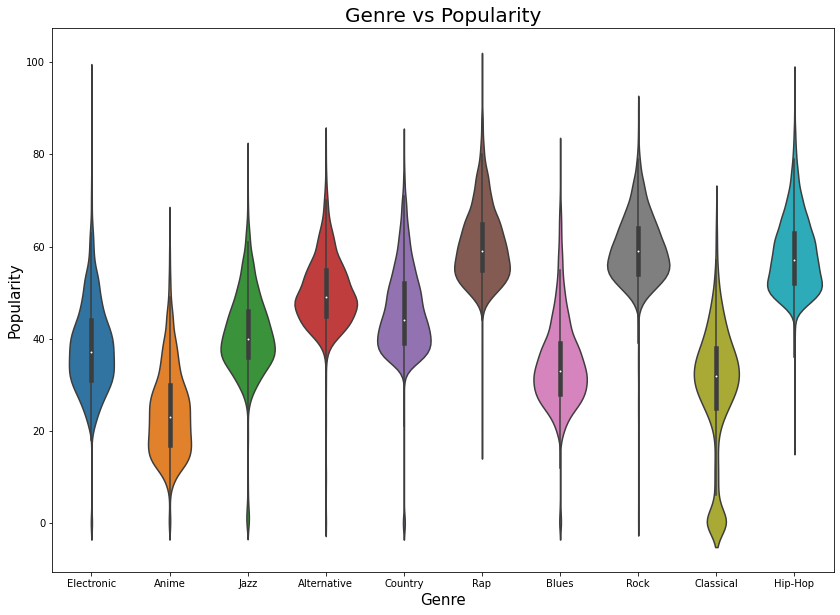

In [6]:
plt.figure(figsize = (14,10))
sns.violinplot(x = data_df.music_genre, y= data_df.popularity)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)
plt.title("Genre vs Popularity", fontsize = 20)
plt.show()

<body>
    <p /> Using the code above, we have plotted a violin plot of genre vs. popularity. Here, all genres are quite unimodal with slight sknewness. We also notice that the meidan popularity varies for each genre. For example, the differnece in median popularity of Rap and Blues is about 65 - 35 = 30, which is quite a big difference. Considering that fact into account, therefore, we can analyze that there is somewhat significant relationship between genre and popularity. This will help us in the future when we are predicting the popularity.
</body>

## Average popularity per Genre

<Figure size 1008x720 with 0 Axes>

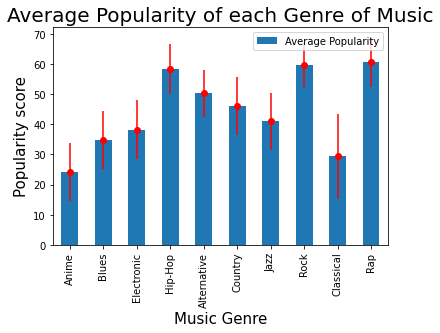

In [7]:
plt.figure(figsize = (14,10))
genres = ["Anime", "Blues", "Electronic", "Hip-Hop", "Alternative", "Country", "Jazz", "Rock", "Classical", "Rap"]
avg_pop = []
std_pop = []
for genre in genres:
    temp = data_df.loc[data_df["music_genre"] == genre]
    avg_pop.append(temp["popularity"].mean())
    std_pop.append(temp["popularity"].std())
avg_pop_df = pd.DataFrame(avg_pop, index = genres, columns = ["Average Popularity"])    

avg_pop_df.plot.bar()
plt.errorbar(genres, avg_pop, yerr=std_pop, fmt="o", color="r")

plt.title("Average Popularity of each Genre of Music", fontsize = 20)
plt.xlabel("Music Genre", fontsize = 15)
plt.ylabel("Popularity score", fontsize = 15)
plt.show()

<body>
    <p />In the code above, I go through every genre of music that is represented in our dataset and find both the average and standard deviation of the popularity of each genre. From this I plotted a bar graph to display the average popularity score of each genre and compare them to each other. Looking at the bar graph it is clear that the three most popular genres are "Hip-Hop", "Rock", and "Rap". Also, the least popular genre of music was "Anime". From this we can assume that if we were to randomly select a track from our database, the track is more likely to have a high popularity score if the genre of the track is either "Rap", "Rock", or "Rap".
</body>

## Duration per Genre vs. Popularity

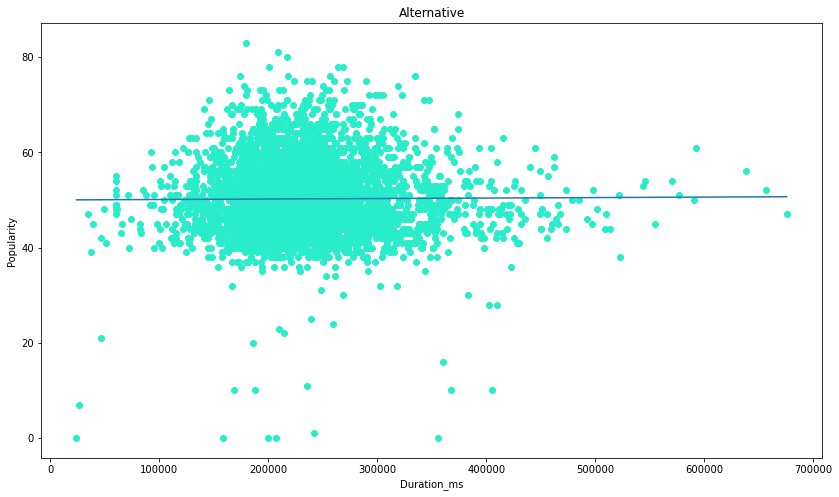

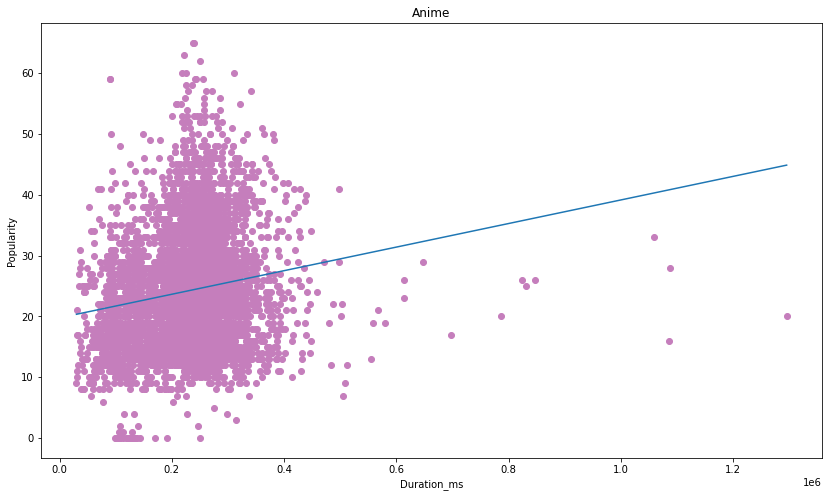

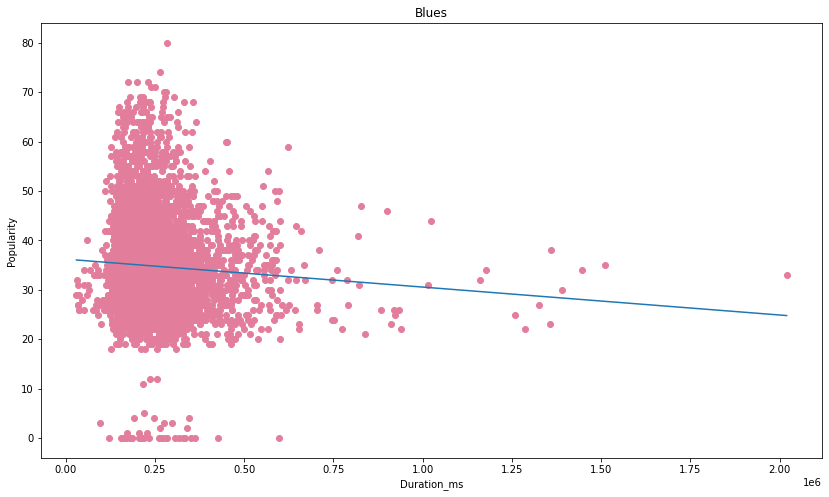

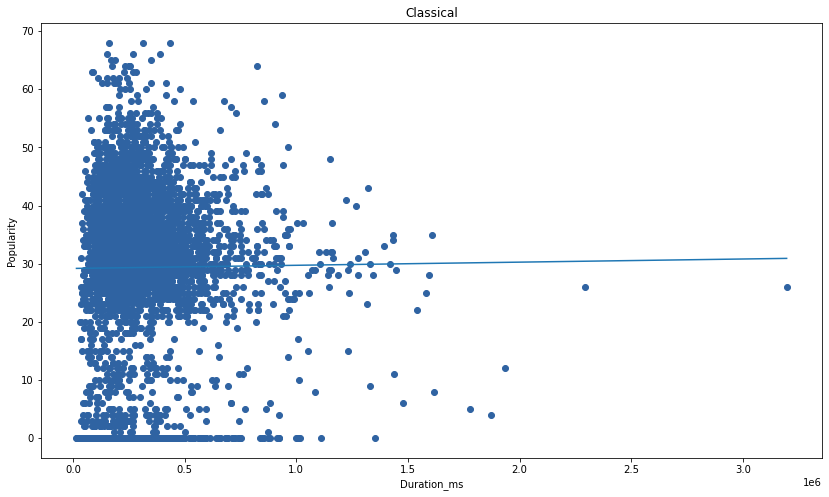

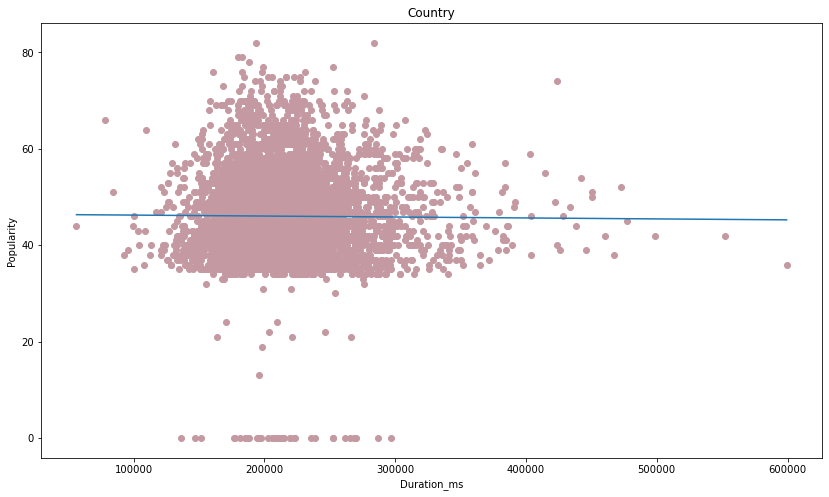

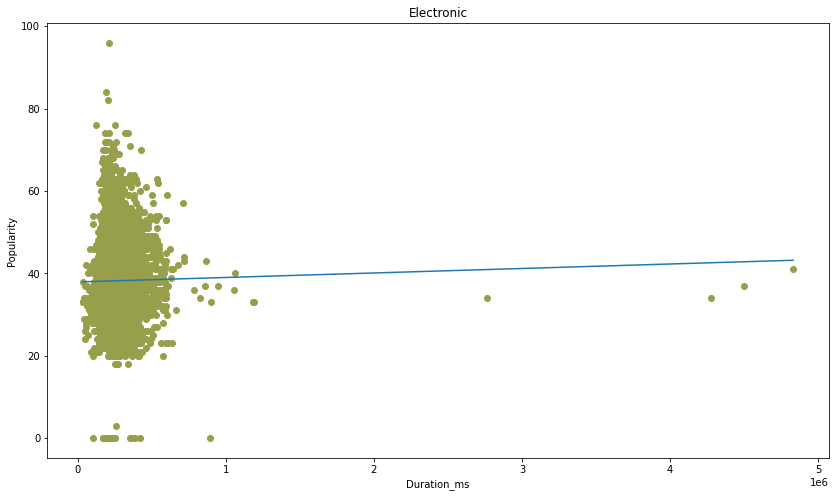

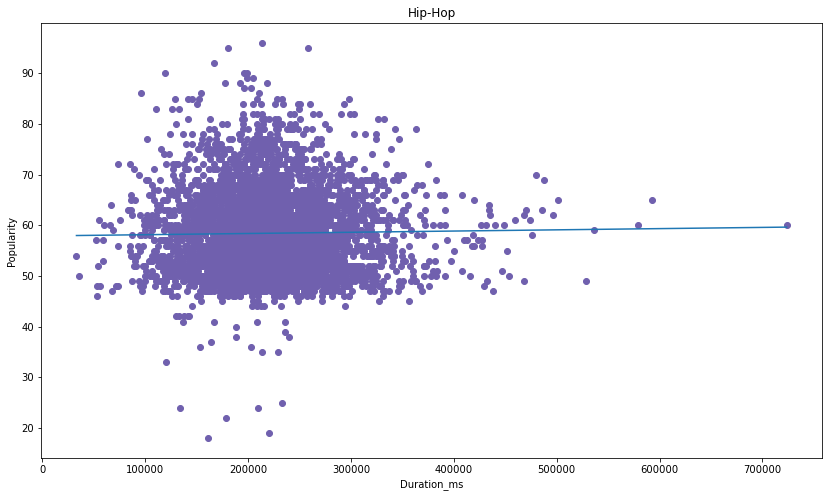

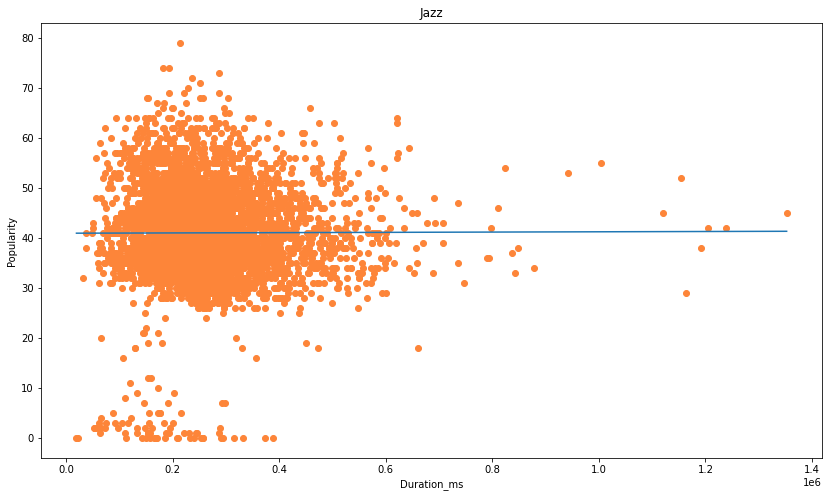

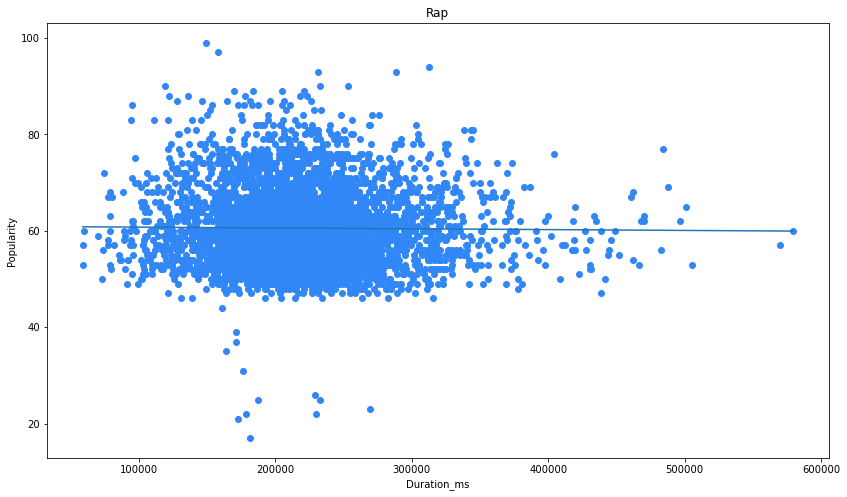

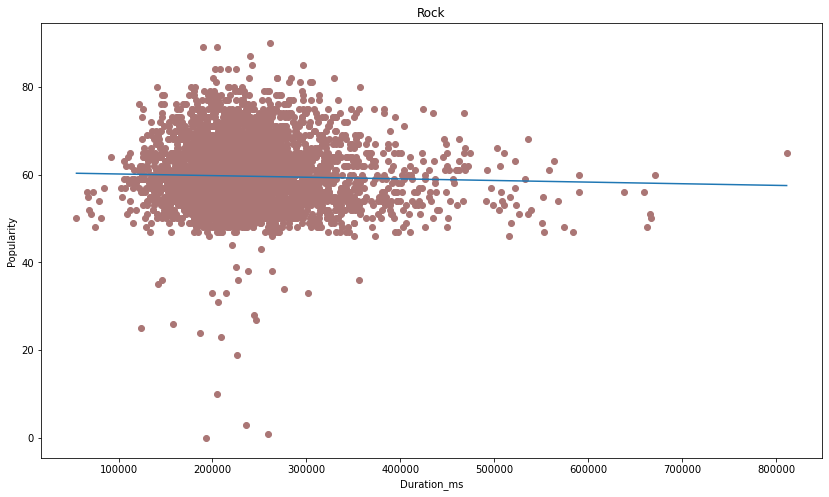

In [15]:
genres = data_df.music_genre.unique()
data_df = data_df.sort_values(by = ['music_genre','duration_ms'])

for genre in genres:
    d = data_df[data_df.music_genre == genre]
    plt.figure(figsize=(14,8))
    x = d.duration_ms
    y = d.popularity
    plt.scatter(x, y, label = genre, color=np.random.rand(3,))
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.xlabel("Duration_ms")
    plt.ylabel("Popularity")
    plt.title(genre)
plt.show()

<body>
    <p /> Since we know that there is a relationship between genre and popularity, we now want to split the dataset by genre to remove the effect of genre to popularity. Then, as planned, we will be plotting the scatterplot of duration vs. popularity with a regression line. From this, we can see that the regression lines for most of genres(except for Anime and maybe Blues) are flat. This indicates there is little or almost no relationship between song's duration and popularity. Hence, we can conclude that we will not be considering song duration as a learning factor when we try to predict the popularity in the future. 
</body>

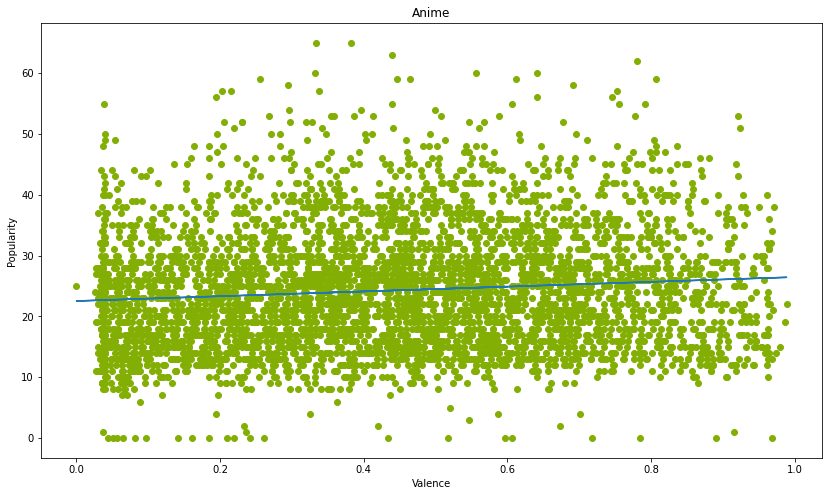

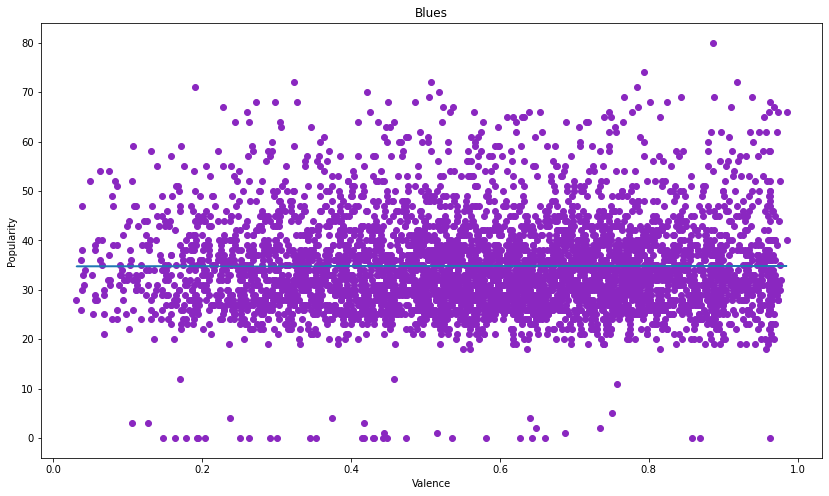

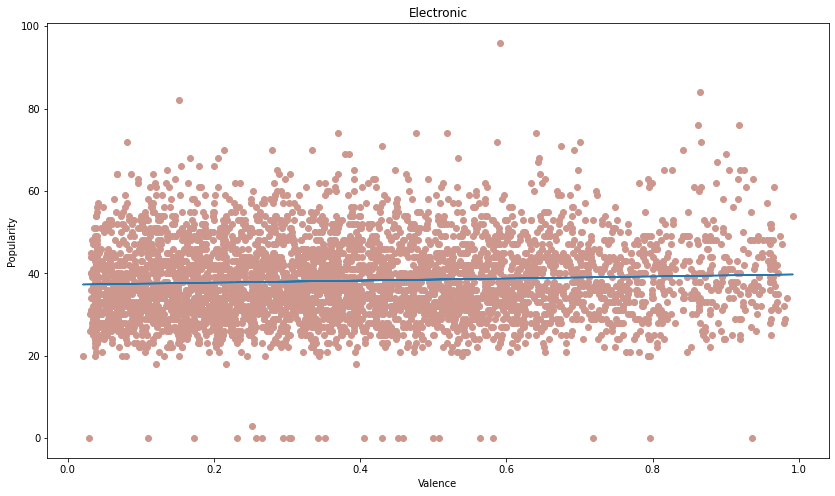

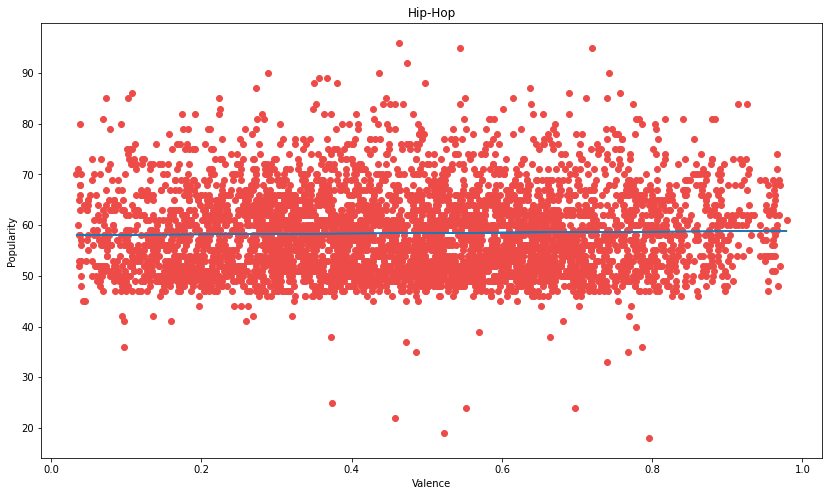

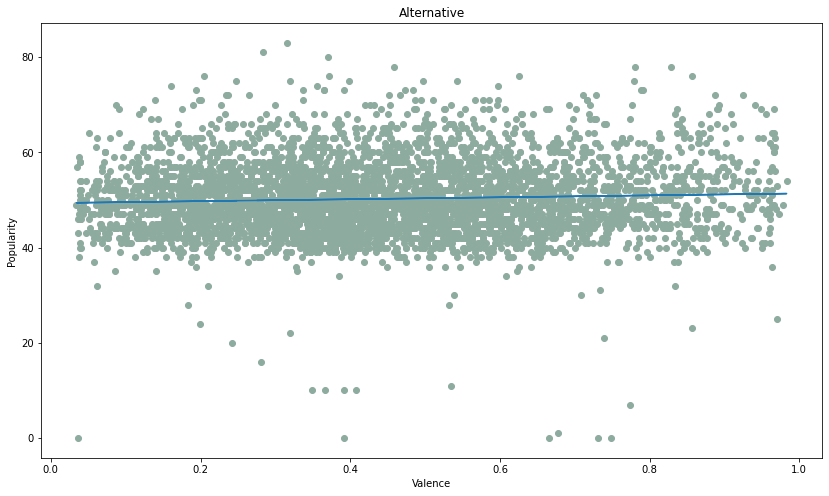

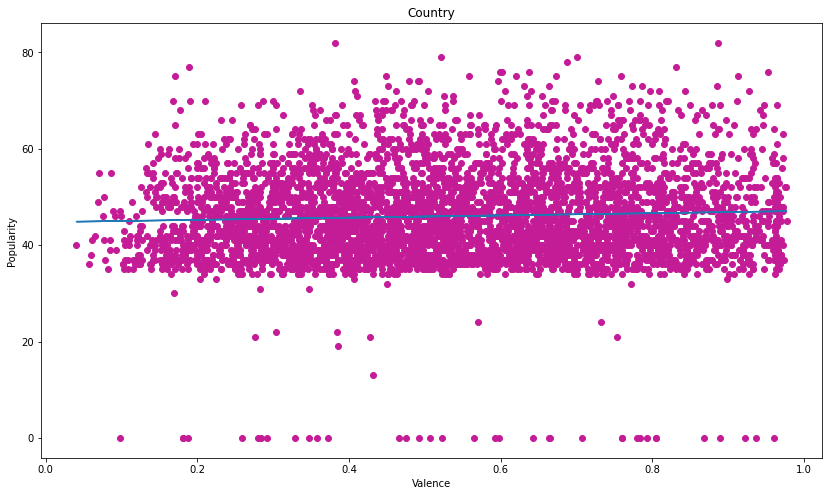

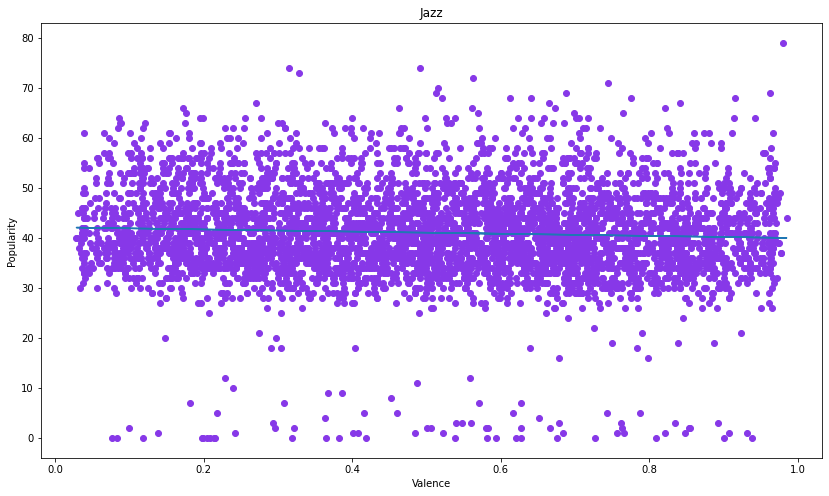

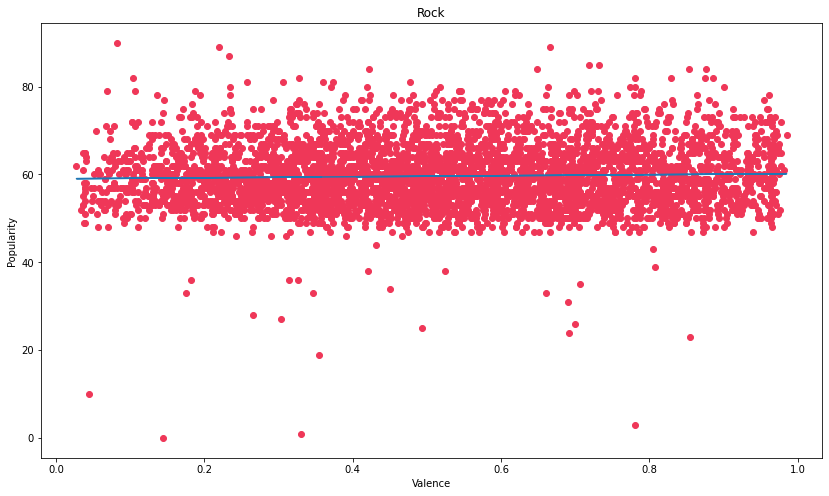

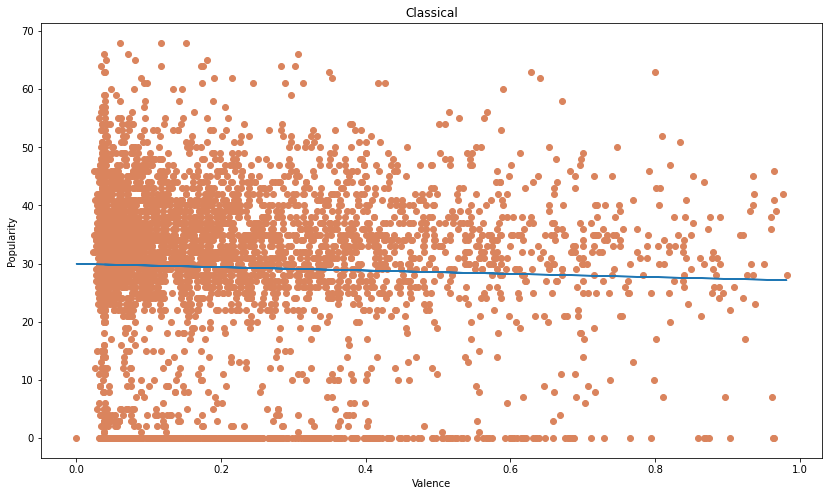

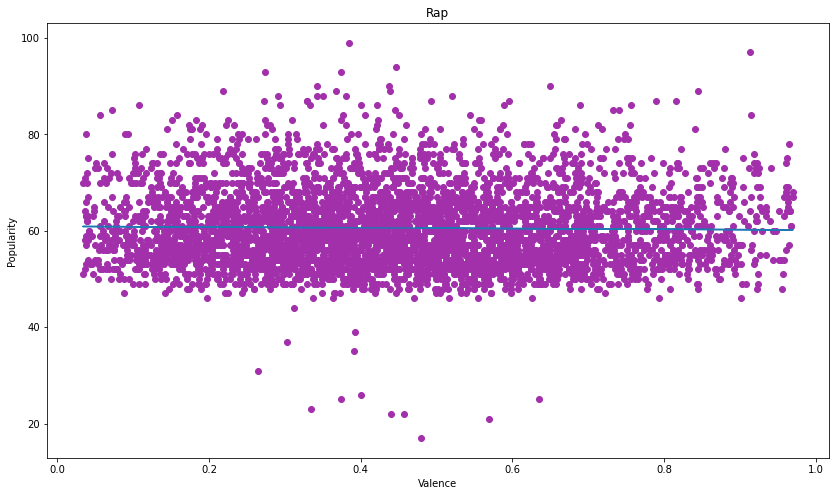

In [22]:
for genre in genres:
    d = data_df[data_df.music_genre == genre]
    plt.figure(figsize=(14,8))
    x = d.valence
    y = d.popularity
    plt.scatter(x, y, label = genre, color=np.random.rand(3,))
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.xlabel("Valence")
    plt.ylabel("Popularity")
    plt.title(genre)
plt.show()

We repeat the same process, we create seperate scatter plot with a linear regression line comparing a track's valence vs. popularity for each genre. From these graphs we can see that the regression line is relatively flat for all of the graphs, meaning that there is little to no relationship between the valence of a track to the track's popularity.